## 데이터로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotting 환경 설정
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터를 구분하는 문자를 지정하는 옵션
# 제목만 전처리한 항목
vod = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/score/csv/vod_prepro_series_nm.csv')
con = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/score/csv/con_prepro_series_nm.csv', encoding='cp949')
vod_id = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/score/csv/vod_id_old.csv', encoding = 'cp949')

In [5]:
vod_id.head(1)

,name,Summary,actors,director,BigCategory,SmallCategory,Category,runningtime,SMRY,rename,counts,vod_id
0,와이낫크루 뜻밖의 여행,NaN,"KCM,권은비,조정식,박현규",NaN,TV 연예/오락,기타,TV프로그램,69분,"# 오늘, 이 동네는 우리가 알잘딱깔센 접수한다! 뻔한 랜드마크는 궁금하지도 않고,...",와이낫크루뜻밖의여행,16,0


# click

In [8]:
content = con.copy()
content.head(3)

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id
0,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,20230813071155,키즈,핑크퐁동물동요,882
1,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,20230813071215,키즈,핑크퐁동물동요,882
2,63086000,지니강이 플러스 시즌7,지니강이 플러스 시즌7,키즈,기타,로봇 세상에서 킥보드를 타요. 로보카 폴리 브룸스 타운에서 킥보드를 타요~ / 새로...,"헤이지니,럭키강이",11,20230827145542,키즈,지니강이플러스시즌7,1623


In [9]:
# clicked = subsr + series_nm 클릭횟수
# count = 전체 클릭 횟수
# click = click/count
clicked = content.groupby(['subsr', 'series_nm']).size().reset_index(name='clicked').sort_values(by='clicked', ascending=False)
clicked

,subsr,series_nm,clicked
3500,64154000,최강 배달꾼,232
453,60326000,천고결진,119
4325,64720000,낭만닥터 김사부3,110
4306,64680000,연인 파트1,105
3695,64385000,TV동물농장,104
...,...,...,...
4417,64776000,자몽TV 네버엔딩 시즌2,1
1662,61181000,트랜스포머: 비스트의 서막,1
4419,64776000,쵸쵸우의 로블록스 월드,1
4421,64776000,특종병기 전랑,1


In [10]:
count = con.groupby(['subsr']).size().reset_index(name='count').sort_values(by='count', ascending=False)
count

,subsr,count
348,64154000,853
378,64385000,837
98,60939000,759
51,60326000,759
68,60593000,632
...,...,...
594,65753000,1
592,65743000,1
154,61509000,1
587,65706000,1


In [11]:
n_con = pd.merge(clicked, count, on='subsr', how='inner')
n_con.columns = ['subsr', 'series_nm', 'clicked', 'count']
n_con

,subsr,series_nm,clicked,count
0,64154000,최강 배달꾼,232,853
1,64154000,사랑의 불시착,94,853
2,64154000,응답하라 1988,75,853
3,64154000,경이로운 소문,68,853
4,64154000,경이로운 소문2: 카운터 펀치,52,853
...,...,...,...,...
7361,64778000,속풀이쇼 동치미,1,1
7362,64785000,귀공자,1,1
7363,61223000,범죄도시3,1,1
7364,64836000,극적인하룻밤,1,1


In [12]:
n_con["c_score"] = n_con["clicked"]/n_con["count"]
score = n_con[['subsr', 'series_nm', 'c_score']]
score

,subsr,series_nm,c_score
0,64154000,최강 배달꾼,0.271981
1,64154000,사랑의 불시착,0.110199
2,64154000,응답하라 1988,0.087925
3,64154000,경이로운 소문,0.079719
4,64154000,경이로운 소문2: 카운터 펀치,0.060961
...,...,...,...
7361,64778000,속풀이쇼 동치미,1.000000
7362,64785000,귀공자,1.000000
7363,61223000,범죄도시3,1.000000
7364,64836000,극적인하룻밤,1.000000


In [13]:
content.head(1)

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id
0,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,20230813071155,키즈,핑크퐁동물동요,882


In [14]:
clicking = pd.merge(content, score, on=['subsr', 'series_nm'], how='inner')
click = clicking[['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'Category', 'c_score']].drop_duplicates()
click

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,Category,c_score
0,65968000,핑크퐁 동물 동요,882,키즈,기타,키즈,0.666667
2,63086000,지니강이 플러스 시즌7,1623,키즈,기타,키즈,0.012195
4,63086000,지니강이 플러스 시즌9,2044,키즈,기타,키즈,0.006098
5,62733000,엘리가간다 시즌12,1959,키즈,기타,키즈,0.500000
6,63086000,지니강이 플러스 시즌8,1597,키즈,기타,키즈,0.012195
...,...,...,...,...,...,...,...
21154,64982000,포켓몬스터 XY and Z,2920,키즈,애니메이션,키즈,0.014493
21155,66864000,포켓몬스터 썬 앤 문 3,3137,키즈,애니메이션,키즈,0.045455
21156,59917000,라바 인 뉴욕,10,키즈,오락,키즈,0.500000
21157,63086000,사이틴 시즌1,3470,키즈,학습,키즈,0.006098


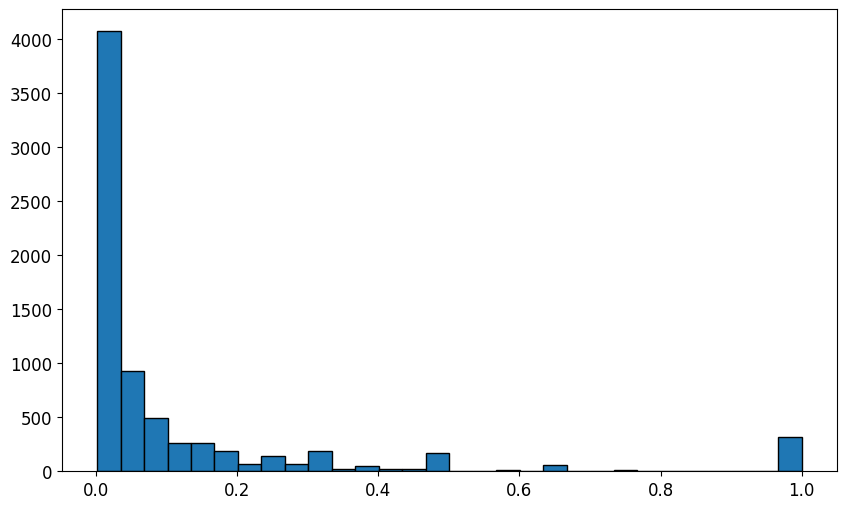

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(click['c_score'], bins=30, edgecolor='black')  # Adjust the number of bins as needed
# plt.title('Distribution of Affinity Values')
# plt.xlabel('Affinity')
# plt.ylabel('Frequency')
plt.show()

In [16]:
click.to_csv('click.csv', index=False, encoding='cp949')

# click_plus

In [17]:
filtered = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/score/csv/filtered_rows.csv')
filtered

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
0,66424000,(HD)나 혼자산다 505회(23/07/28),TV 연예/오락,기타,1452,네가 알던 내가 아냐 편. 무지개 회원들의 반전 가득한 하루! 쇼 음악중심 스페셜 ...,"전현무,기안84,박나래,키,코드쿤스트",1:32,20230831182001
1,66620000,(HD)런닝맨 665회(23/07/30),TV 연예/오락,기타,900,여름방학 편 - 런닝맨이 또 떴다. 4주간 진행되는 런떴 여름방학 프로젝트! 패밀리...,"유재석,지석진,김종국,하하,송지효,양세찬,전소민",1:33,20230828111319
2,66620000,(HD)런닝맨 664회(23/07/23),TV 연예/오락,기타,5520,유재석의 문화유산답사기. 수학여행 감성 가득한 추억 흠뻑 여행! 시간 체크는 필수!...,"유재석,지석진,김종국,하하,송지효,양세찬,전소민",1:32,20230828093843
3,63665000,내 딸 금사월 47회,TV드라마,기타,3481,기황과 세훈은 혜상을 오월이 사고의 범인으로 확신하고 사고 현장으로 데려간다. 사월...,"백진희,윤현민,박세영,도상우,전인화,손창민,박상원,도지원",1:04,20230829182202
4,66875000,내 눈에 콩깍지(KBS) 90회(23/02/06),TV드라마,기타,1279,원섭을 집으로 초대한 장 회장과 이재는 형편이 어려워 세준을 따로 만나 부탁을 한 ...,"백성현,배누리,최윤라,정수환",0:28,20230818132444
...,...,...,...,...,...,...,...,...,...
786,66317000,호랑이 뱃속 잔치,키즈,학습,577,인천교육지원청 추천도서! 익살맞은 이야기를 통해 아이들은 상상력을 키우고 이야기의 ...,-,0:10,20230903224835
787,66317000,호랑이 뱃속 잔치,키즈,학습,55,인천교육지원청 추천도서! 익살맞은 이야기를 통해 아이들은 상상력을 키우고 이야기의 ...,-,0:10,20230901214252
788,66317000,이파라파냐무냐무,키즈,학습,720,"[캐릭터, 반전, 중독성 있는 이야기 이지은 작가의 매력적인 베스트셀러] 올해 최고...",-,0:12,20230905193845
789,66317000,알사탕,키즈,학습,480,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,0:08,20230903223544


In [18]:
data = filtered[['subsr', 'asset_nm', 'ct_cl', 'genre_of_ct_cl']]

# 무삭제 제거
data['asset_nm'] = data['asset_nm'].str.replace(r'무삭제판|무삭제', '', regex = True)

# 예고편 제거
data = data[~data['asset_nm'].str.contains(r'\(예고편\)|\(예고\)', regex=True)]

# 예약구매, 사전구매 제거
data = data[~data['asset_nm'].str.contains('예약구매|사전구매')]

# 00회가 포함된 행은 런타임이 0또는 1이므로 제거
data = data[~data['asset_nm'].str.contains(r'\b00회\b')]

# 괄호와 그 안의 내용 제거
data['asset_nm'] = data['asset_nm'].str.replace(r'\([^()]*\)', '', regex=True)
data['asset_nm'] = data['asset_nm'].str.replace(r'\[[^\[\]]*\]', '', regex=True)
data['asset_nm'] = data['asset_nm'].str.replace(r'\.\.\.', '', regex=True)
data['asset_nm'] = data['asset_nm'].str.replace(r'\…', '', regex=True) # … 기호 제거
data['asset_nm'] = data['asset_nm'].str.rstrip('.')
data['asset_nm'] = data['asset_nm'].str.replace('-', " ")
data['asset_nm'] = data['asset_nm'].str.strip()

data['asset_nm'] = data['asset_nm'].str.replace(r'\d+회$', '', regex=True)
data['asset_nm'] = data['asset_nm'].str.replace(r'\d+회\.', '', regex=True)
data['asset_nm'] = data['asset_nm'].str.replace(r'\d+화$', '', regex=True)
data['asset_nm'] = data['asset_nm'].str.strip()
data['asset_nm'] = data['asset_nm'].str.rstrip('.')

# 셋탑번호가 66056000인 것 삭제 - content 에서 이상치 아이디로 판별
data = data[data['subsr'] != 66056000]

data['rename'] = data['asset_nm'].copy()
data['rename'] = data['rename'].str.replace(r'\d+회$', '', regex=True)
data['rename'] = data['rename'].str.replace(r'\d+회\.', '', regex=True)
data['rename'] = data['rename'].str.replace(r'\d+화$', '', regex=True)
data['rename'] = data['rename'].str.strip()
data['rename'] = data['rename'].str.rstrip('.')

data['category'] = data['ct_cl'].apply(lambda x : x if x in ['영화', '키즈'] else 'TV프로그램')
data['rename'] = data['rename'].apply(lambda x : x.replace(' ', '') if isinstance(x, str) else x)

data

<ipython-input-18-61c250697b58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['asset_nm'] = data['asset_nm'].str.replace(r'무삭제판|무삭제', '', regex = True)


,subsr,asset_nm,ct_cl,genre_of_ct_cl,rename,category
0,66424000,나 혼자산다,TV 연예/오락,기타,나혼자산다,TV프로그램
1,66620000,런닝맨,TV 연예/오락,기타,런닝맨,TV프로그램
2,66620000,런닝맨,TV 연예/오락,기타,런닝맨,TV프로그램
3,63665000,내 딸 금사월,TV드라마,기타,내딸금사월,TV프로그램
4,66875000,내 눈에 콩깍지,TV드라마,기타,내눈에콩깍지,TV프로그램
...,...,...,...,...,...,...
786,66317000,호랑이 뱃속 잔치,키즈,학습,호랑이뱃속잔치,키즈
787,66317000,호랑이 뱃속 잔치,키즈,학습,호랑이뱃속잔치,키즈
788,66317000,이파라파냐무냐무,키즈,학습,이파라파냐무냐무,키즈
789,66317000,알사탕,키즈,학습,알사탕,키즈


In [19]:
# id 병합
id = vod_id[['rename', 'Category', 'vod_id']]
id.columns = ['rename', 'category', 'vod_id']
id

,rename,category,vod_id
0,와이낫크루뜻밖의여행,TV프로그램,0
1,그레이트뷰티,영화,1
2,해안선,영화,2
3,아는형님,TV프로그램,3
4,베놈,영화,4
...,...,...,...
4710,베놈2:렛데어비카니지,영화,4710
4711,성월동화,영화,4711
4712,다큐인사이트코드블루,TV프로그램,4712
4713,캠프제로베이스원,TV프로그램,4713


In [20]:
df = data.merge(id, on = ['rename', 'category'], how = 'left')
plus = df[['subsr', 'asset_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category']]
plus.columns = ['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'Category']
plus = plus[['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'Category']].drop_duplicates()

plus

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,Category
0,66424000,나 혼자산다,432,TV 연예/오락,기타,TV프로그램
1,66620000,런닝맨,296,TV 연예/오락,기타,TV프로그램
3,63665000,내 딸 금사월,1157,TV드라마,기타,TV프로그램
4,66875000,내 눈에 콩깍지,490,TV드라마,기타,TV프로그램
6,66875000,금이야 옥이야,784,TV드라마,기타,TV프로그램
...,...,...,...,...,...,...
774,60463000,엄지 아가씨,694,키즈,기타,키즈
775,65724000,라바 시즌1,55,키즈,오락,키즈
778,65724000,라바 인 뉴욕,10,키즈,오락,키즈
783,66317000,꽁꽁꽁,1036,키즈,학습,키즈


In [21]:
click.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7384 entries, 0 to 21158
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subsr           7384 non-null   int64  
 1   series_nm       7384 non-null   object 
 2   vod_id          7384 non-null   int64  
 3   ct_cl           7384 non-null   object 
 4   genre_of_ct_cl  7384 non-null   object 
 5   Category        7384 non-null   object 
 6   c_score         7384 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 461.5+ KB


In [22]:
# 'c_score'가 있는 경우에만 merge, 없는 경우에는 1로 채우기
click_plus = pd.concat([click, plus], axis=0, join='outer', sort=False).fillna({'c_score': 1}).reset_index()
click_plus = click_plus.sort_values(by = 'subsr').reset_index(drop = True)
click_plus

,index,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,Category,c_score
0,7583,59879000,나의 해방일지,1860,TV드라마,기타,TV프로그램,0.111111
1,7692,59879000,나쁜엄마,3405,TV드라마,기타,TV프로그램,0.111111
2,6260,59879000,소방서 옆 경찰서,2093,TV드라마,기타,TV프로그램,0.333333
3,7971,59879000,쌍갑포차,3117,TV드라마,기타,TV프로그램,0.111111
4,7559,59879000,낭만닥터 김사부2,1168,TV드라마,기타,TV프로그램,0.111111
...,...,...,...,...,...,...,...,...
7580,14802,67160000,심야괴담회,143,TV 연예/오락,기타,TV프로그램,0.125000
7581,19833,67160000,메가로돈 2,4020,영화,액션/어드벤쳐,영화,0.125000
7582,20554,67161000,스파이 코드명 포춘,3826,영화,액션/어드벤쳐,영화,1.000000
7583,19935,67164000,미션 임파서블: 데드 레코닝 PART ONE,2869,영화,액션/어드벤쳐,영화,0.250000


In [23]:
click_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585 entries, 0 to 7584
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           7585 non-null   int64  
 1   subsr           7585 non-null   int64  
 2   series_nm       7585 non-null   object 
 3   vod_id          7585 non-null   int64  
 4   ct_cl           7585 non-null   object 
 5   genre_of_ct_cl  7585 non-null   object 
 6   Category        7585 non-null   object 
 7   c_score         7585 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 474.2+ KB


In [24]:
click_plus.to_csv('click_plus.csv', encoding='cp949', index=False)